Hello, my name is Artem. I'm going to review your project!

You can find my comments in <font color='green'>green</font>, <font color='blue'>blue</font> or <font color='red'>red</font> boxes like this:
<div class="alert alert-block alert-success">
<b>Success:</b> if everything is done succesfully
</div>

<div class="alert alert-block alert-info">
<b>Remarks: </b> if I can give some recommendations
</div>

<div class="alert alert-block alert-danger">
<b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments.
</div>

### <font color='orange'>General feedback</font>
* Thank you for this work. It was interesting to check.
* The code is well structured so it's easy to read and understand.
* There are some tips and comments for improvement. They don't mean that you did anything wrong, but they're things we wanted to point out that can help you further develop your skills. 
* Great that you are choosing appropriate types of graphs. I was really surprised!
* Thank you for using markdown cells to for structuring your project. Keep it up!
* Try to use some markdown tips in the overall conclusion.
* Your project has passed code-review. Congratulations! Good luck with further sprints!

## Integrated project - 1

#### Goal:  
Make a 2017 compaign for gaming industry using the information about sales, ratings, scores of games of previous years. 
#### Plan:
1. Preparing the data. To change the datatypes and fill in the missing data. 
2. Data analysis. To plot graphs of yearly total sales, games' distribution on platforms etc. 
3. Creating a user profile. To identify the market shares of top-5 platforms and genres in 3 regions. 
4. Testing hypotheses. To test 2 hypotheses.
5. Making a general conclusion.

### Step 1. Opening the data

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('/datasets/games.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div class="alert alert-block alert-info">
<b>Remarks: </b> Don't forget about <span style="font-family: monospace"> .head() </span>.
</div>

### Step 2. Data preparation

#### Converting the data

In [2]:
#Lowercasing the column names
data.columns = data.columns.str.lower()

<div class="alert alert-block alert-success">
<b>Success:</b> Well done! It's the best way to lowercase columns names!
</div>

In [3]:
#Converting the year to datetime
data.year_of_release = data.year_of_release.fillna(1970) #the rows with years are missing, they were randomly filled with 1970
#data with the year 1970 will be ignored in analysis
data.year_of_release = pd.to_datetime(data.year_of_release, format='%Y') 

In [4]:
data.query('user_score=="tbd"').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010-01-01,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005-01-01,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011-01-01,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010-01-01,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,1970-01-01,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E


In [5]:
data.user_score = pd.to_numeric(data.user_score, errors='coerce')

<div class="alert alert-block alert-success">
<b>Success:</b> Changing tbd to NaNs was a good idea!
</div>

In [6]:
data['year'] = data['year_of_release'].dt.year
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,2006
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,1985
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2008
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,2009
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,1996


The datatype has been changed in "year_of_release" and "user_score" columns. The columns had float and object datatypes respectively which are not appropriate for further analysis. "tbd" abbreviation in "user_score" column has been replaced by NaN when converted to float datatype.

<div class="alert alert-block alert-info">
<b>Remarks: </b> What for you need both 'year_of_release' and 'year'?
</div>

#### Filling the missing values

In [7]:
data.genre.value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

In [8]:
#Missing info about the genre is filled with Action genre because it is the most popular
data.genre = data.genre.fillna('Action')

In [9]:
data.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [10]:
#According to ESRB K-A is just an old name for E rating, that's why it is replaced
data['rating'].replace({"K-A":"E"}, inplace=True)

In [11]:
#Identifying missing values
data[data.isna().any(axis=1)].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,1985
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,1996
5,Tetris,GB,1989-01-01,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,1989
9,Duck Hunt,NES,1984-01-01,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,1984
10,Nintendogs,DS,2005-01-01,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,2005
12,Pokemon Gold/Pokemon Silver,GB,1999-01-01,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN,1999
18,Super Mario World,SNES,1990-01-01,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN,1990
20,Pokemon Diamond/Pokemon Pearl,DS,2006-01-01,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN,2006
21,Super Mario Land,GB,1989-01-01,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN,1989
22,Super Mario Bros. 3,NES,1988-01-01,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN,1988


Missing values are found primarily in "critic_score", "user_score" and "rating" columns. The important point is that the values are missed in all three, not just randomly. There was probably no information about these numbers that's why they are missing. The score values will be filled by mean critic and user scores of each particular genre. Missing values in "rating" will be left as "unknown".

<div class="alert alert-block alert-success">
<b>Success:</b> It was good insight!
</div>

In [12]:
data.rating = data.rating.fillna('unknown')

<div class="alert alert-block alert-success">
<b>Success:</b> I would have done the same.
</div>

In [13]:
data['critic_score'] = data.groupby('genre')['critic_score'].transform(lambda x: x.fillna(x.mean()))
data['user_score'] = data.groupby('genre')['user_score'].transform(lambda x: x.fillna(x.mean()))

In [14]:
data[['critic_score', 'user_score']] = data[['critic_score', 'user_score']].round(decimals=2)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,2006
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,68.06,7.30,unknown,1985
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,2008
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,2009
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,72.65,7.62,unknown,1996
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016-01-01,Action,0.00,0.00,0.01,0.00,66.63,7.05,unknown,2016
16711,LMA Manager 2007,X360,2006-01-01,Sports,0.00,0.01,0.00,0.00,71.97,6.96,unknown,2006
16712,Haitaka no Psychedelica,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.00,65.33,7.13,unknown,2016
16713,Spirits & Spells,GBA,2003-01-01,Platform,0.01,0.00,0.00,0.00,68.06,7.30,unknown,2003


<div class="alert alert-block alert-info">
<b>Remarks: </b> It was not a good idea to fill them even according to the genre. You've added a lot of noise in scores now so it will be harder to detect some correlations.
</div>

In [15]:
data['total_sales'] = data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 13 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16715 non-null datetime64[ns]
genre              16715 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       16715 non-null float64
user_score         16715 non-null float64
rating             16715 non-null object
year               16715 non-null int64
total_sales        16715 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(1), object(4)
memory usage: 1.7+ MB


<div class="alert alert-block alert-success">
<b>Success:</b> You've calculated 'total_sales' absolutely right!
</div>

<div class="alert alert-block alert-info">
<b>Remarks: </b> What about missing values in 'name' column? Explain, why you've decided to leave them as-is.
</div>

### Step 3. Data Analysis

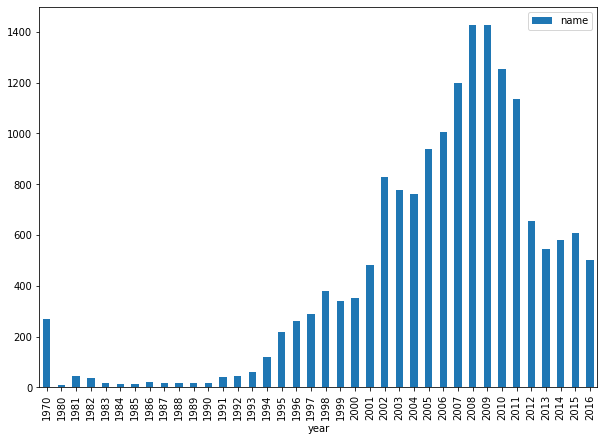

In [16]:
year = data.pivot_table(index='year', values='name', aggfunc='count')
year.plot(kind='bar', figsize=(10, 7))

<div class="alert alert-block alert-success">
<b>Success:</b> Very good plot!
</div>

In [17]:
platform = (data
            .pivot_table(index='platform', values='total_sales', aggfunc='sum')
            .sort_values(by='total_sales', ascending=False)
            .reset_index()
)
top10_platform = platform.iloc[0:10]
top10_platform

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


<div class="alert alert-block alert-info">
<b>Tip start: </b> You can split code in several lines with the help of '\' like this:
</div>

In [1]:
2 * \
2

4

<div class="alert alert-block alert-info">
<b>Tip end. </b> 
</div>

In [18]:
data['top10_platform'] = (
    data['platform']
    .where(data['platform'].isin(top10_platform.platform), 'Other')
)

<div class="alert alert-block alert-success">
<b>Success:</b> Good that 'Other' column was created!
</div>

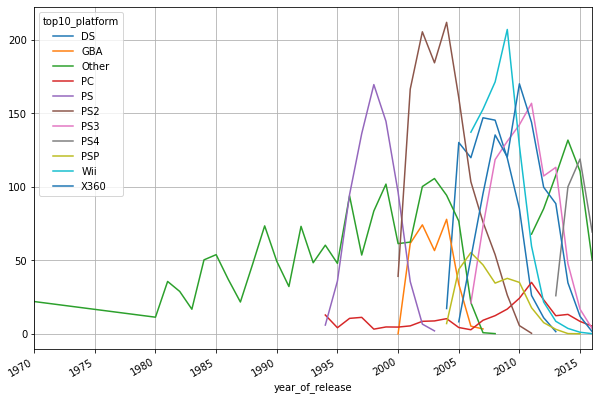

In [19]:
top10 = data.pivot_table(index='year_of_release', columns='top10_platform', values='total_sales', aggfunc='sum')
top10.plot(figsize=(10, 7), grid=True)

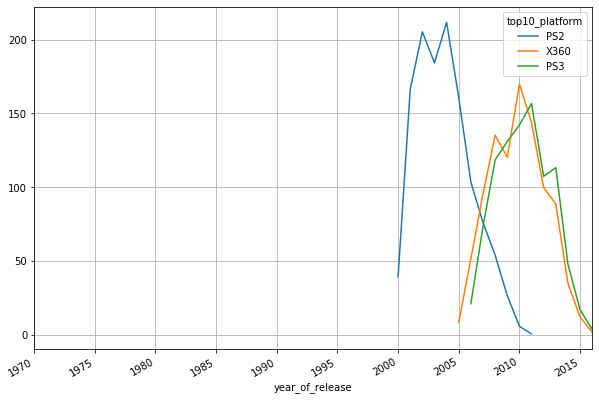

In [20]:
top10[['PS2', 'X360', 'PS3']].plot(figsize=(10, 7), grid=True)

Three most popular platforms with greatest sales were chosen - PS2, PS3 and X360. The first graph shows total sales distribution for top-10 platforms, as seen from the figure it generally takes about 5 years for a platform to reach the peak of sales and then 5 more years to have no sales at all. For example, all three platforms with the greatest sales used to be very popular but by the year 2015 they has had 0 sales. When some platform's popularity starts to decline another platform comes on the market. 

<div class="alert alert-block alert-success">
<b>Success:</b> Great! Graphs are perfect! Thank you for using figsize!
</div>

Further analysis will include 2010-2016 years. This period should be enough to make a prognosis for 2017 sales.  

In [21]:
#Renewing the data, data only includes 2010-2016 years
data['year'] = data['year_of_release'].dt.year
data_new = data.query('year >= 2010').reset_index(drop=False)
data_new.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year,total_sales,top10_platform
0,14,Kinect Adventures!,X360,2010-01-01,Misc,15.00,4.89,0.24,1.69,61.00,6.30,E,2010,21.82,X360
1,16,Grand Theft Auto V,PS3,2013-01-01,Action,7.02,9.09,0.98,3.96,97.00,8.20,M,2013,21.05,PS3
2,23,Grand Theft Auto V,X360,2013-01-01,Action,9.66,5.14,0.06,1.41,97.00,8.10,M,2013,16.27,X360
3,27,Pokemon Black/Pokemon White,DS,2010-01-01,Role-Playing,5.51,3.17,5.65,0.80,72.65,7.62,unknown,2010,15.13,DS
4,29,Call of Duty: Modern Warfare 3,X360,2011-01-01,Shooter,9.04,4.24,0.13,1.32,88.00,3.40,M,2011,14.73,X360


<div class="alert alert-block alert-success">
<b>Success:</b> Chose of period was well-reasoned!
</div>

In [22]:
platform_rating = (data_new
            .pivot_table(index='platform', values='total_sales', aggfunc='sum')
            .sort_values(by='total_sales', ascending=False)
            .reset_index()
)
platform_rating

,platform,total_sales
0,PS3,587.74
1,X360,550.41
2,PS4,314.14
3,3DS,257.81
4,Wii,222.97
5,XOne,159.32
6,DS,123.75
7,PC,121.96
8,WiiU,82.19
9,PSP,64.05


In [23]:
platform_rating_by_year = data_new.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
platform_rating_by_year

platform,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,,
2010-01-01,NaN,85.02,24.28,5.64,142.17,NaN,35.04,NaN,127.95,NaN,170.03,NaN
2011-01-01,63.20,26.18,35.03,0.45,156.78,NaN,17.82,4.63,59.65,NaN,143.84,NaN
2012-01-01,51.36,11.01,23.22,NaN,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013-01-01,56.57,1.54,12.38,NaN,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014-01-01,43.76,NaN,13.28,NaN,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015-01-01,27.78,NaN,8.52,NaN,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016-01-01,15.14,NaN,5.25,NaN,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


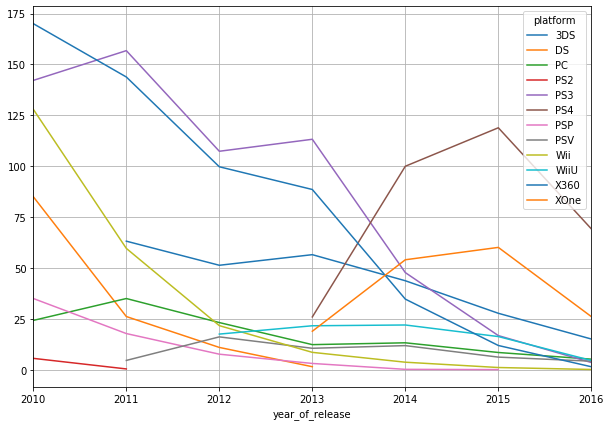

In [24]:
platform_rating_by_year = data_new.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
platform_rating_by_year.plot(figsize=(10, 7), grid=True)

As seen from the graph all of the contemporary gaming platforms are shrinking and losing their popularity. The most profitable platforms are PS4, XOne, 3DS. 

<div class="alert alert-block alert-info">
<b>Remarks: </b> Avoid code duplication, <span style="font-family: monospace"> platform_rating_by_year </span> was already calculated.
</div>

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


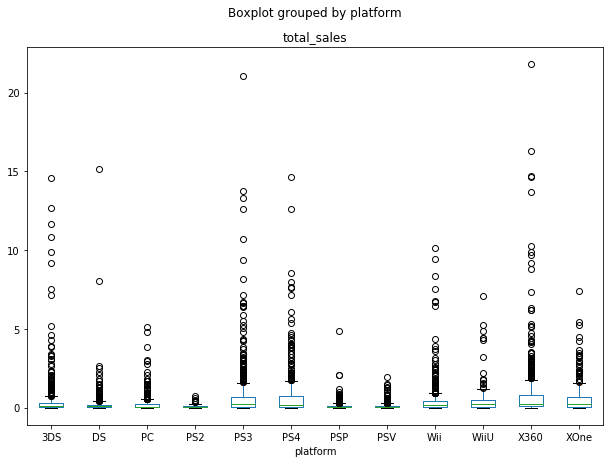

In [25]:
data_new.boxplot(column='total_sales', by='platform', grid=False, figsize=(10, 7))

The distributions of sales show that all of the platforms have a significant number of outliers. All of the platforms except for PS2, PSP and PSV have a median of total sales which is less than 1m USD. This means that a half of the games do not gain more than 1m.The three platforms mentioned before are the least profitable. In general, there is a significant difference in sales among all of platforms and the most outstanding ones are 3DC, PS4, PS3 anf X360, which have outliers that exceed 20m USD.   

<div class="alert alert-block alert-success">
<b>Success:</b> Very good that boxplots for different platforms were shown in one row so we could easily compare them.
</div>

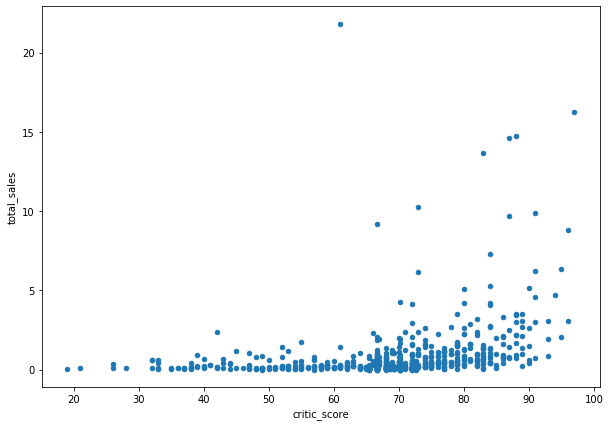

In [26]:
data_new.query('platform=="X360"').plot(kind='scatter', x='critic_score', y='total_sales', figsize=(10, 7))

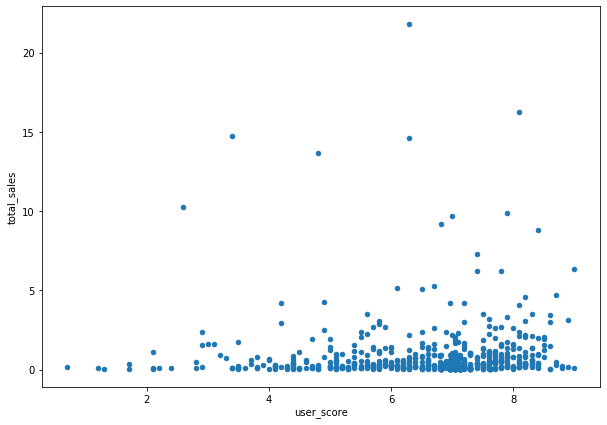

In [27]:
data_new.query('platform=="X360"').plot(kind='scatter', x='user_score', y='total_sales', figsize=(10, 7))

In [28]:
print('Critic score and total sales correlation', data_new.query('platform=="X360"')['critic_score'].corr(data_new['total_sales']).round(decimals=3))
print('User score and total sales correlation', data_new.query('platform=="X360"')['user_score'].corr(data_new['total_sales']).round(decimals=3))

Critic score and total sales correlation 0.321
User score and total sales correlation 0.024


The figures show the distribution of user and critic scores vs. total sales for X360. As for the critic scores, the higher the scores the more are the total sales. The situation is not the same for user scores, which show that games with very low scores have very high total sales. The correlation calculation showed that total sales for games on X360 do not really depend on any scores. 

In [29]:
#Identifying the correlation between total sales and critic/user scores for other plarforms 
#for the same games that were released on X360
games_X360 = data_new.query('platform=="X360"')['name']
data_X360 = data_new
data_X360['games_of_X360'] = (
    data_new['name']
    .where(data_new['name'].isin(games_X360), 'Other')
)

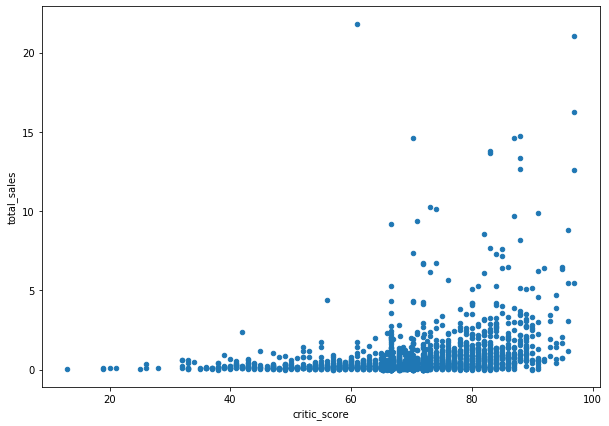

In [30]:
data_X360.query('games_of_X360 != "Other"').plot(kind='scatter', x='critic_score', y='total_sales', figsize=(10, 7))

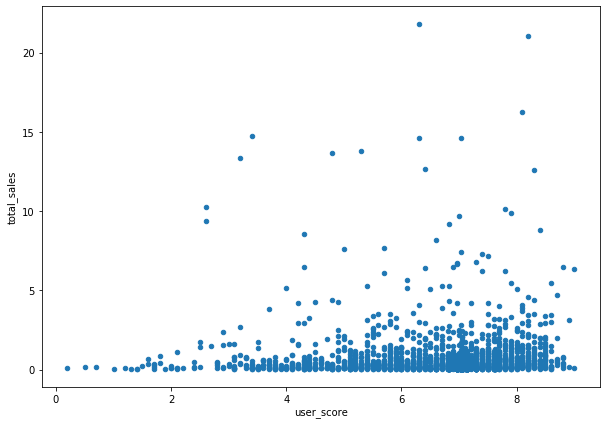

In [31]:
data_X360.query('games_of_X360 != "Other"').plot(kind='scatter', x='user_score', y='total_sales', figsize=(10, 7))

As we see there is no difference for the other platforms too, user/critic scores do not identify future sales. 

<div class="alert alert-block alert-success">
<b>Success:</b> Good analysis!
</div>

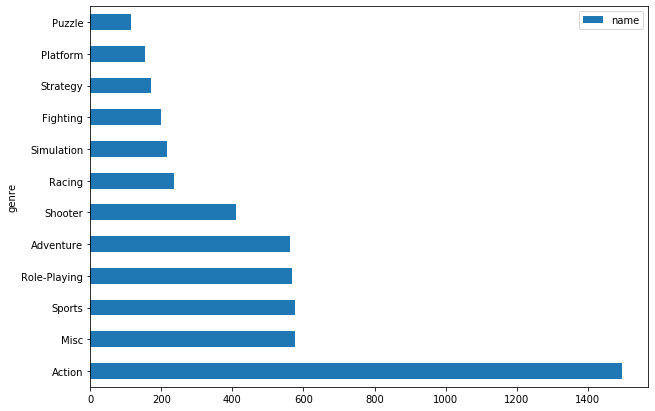

In [32]:
genre_distribution = data_new.pivot_table(index='genre', values='name', aggfunc='count').sort_values(by='name', ascending=False)
genre_distribution.plot(kind='barh', figsize=(10, 7))

In [33]:
genre_by_year = data_new.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
genre_by_year

,total_sales
genre,
Action,673.09
Shooter,479.74
Sports,328.39
Role-Playing,315.28
Misc,234.56
Racing,122.68
Platform,119.72
Fighting,81.59
Simulation,71.75


<div class="alert alert-block alert-info">
<b>Remarks: </b> Please, explain the variable name: <span style="font-family: monospace"> genre_by_year </span>? I can't understand what means by_year.
</div>

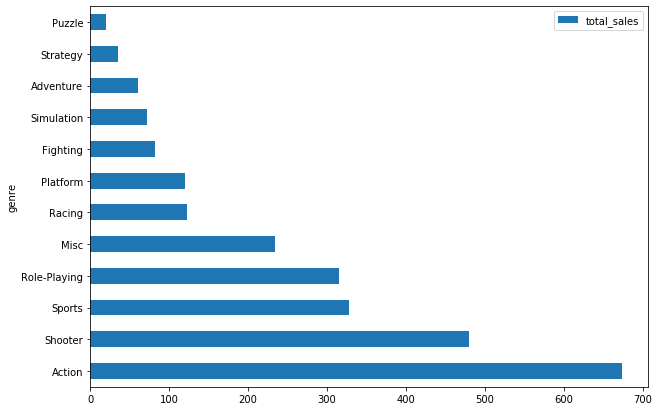

In [34]:
genre_by_year.plot(kind='barh', figsize=(10, 7))

The graphs show the number of games in each of the genres and total sales profit for each particular genre. As we see the total leader is Action genre, it has the highers revenue and the largest number of games released. The other two genres that bring the most revenue are Shooter and Sports. The genres that bring the least profit are Puzzle, Strategy and Adventure, which is interesting because there were as many games released for Adventure genre as for Sports or Shooter. Adventure genre is probably not very profitable. 

<div class="alert alert-block alert-success">
<b>Success:</b> You've explained graphs absolutely right!
</div>

### Step 4. Creating a user profile

Calculating the market share of top 5 platforms in each region

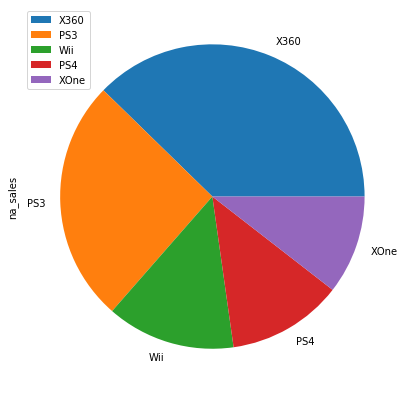

In [35]:
na_platform = data_new.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(ascending=False, by='na_sales')
na_platform = na_platform[0:5]
na_platform.plot(kind='pie', figsize=(10, 7), y='na_sales')

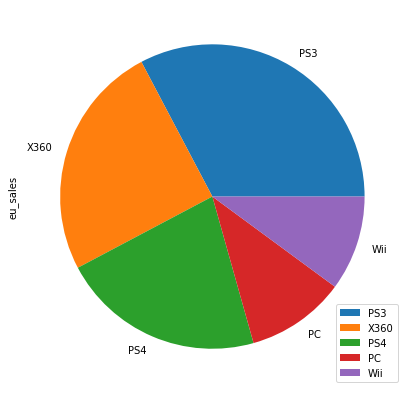

In [36]:
eu_platform = data_new.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(ascending=False, by='eu_sales')
eu_platform = eu_platform[0:5]
eu_platform.plot(kind='pie', figsize=(10, 7), y='eu_sales')

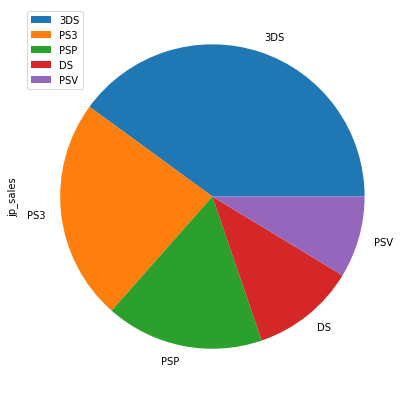

In [37]:
jp_platform = data_new.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(ascending=False, by='jp_sales')
jp_platform = jp_platform[0:5]
jp_platform.plot(kind='pie', figsize=(10, 7), y='jp_sales')

In North America and Europe X360 and PS3 both occupy the market share of more than 50%, with PS3 being a leader in Europe and X360 in NA. Surprisingly, in Japan X360 is not even among the top 5 platforms. 3DS is a leader in this country followed by PS3 and PSP. 

Calculating the market share of top 5 genres in each region

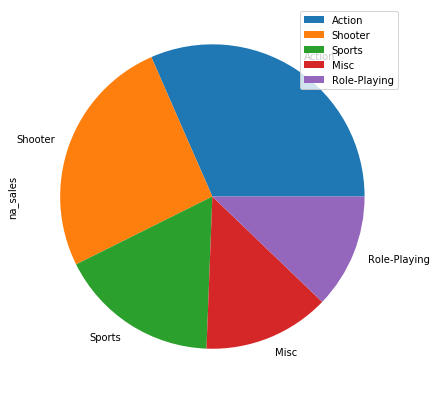

In [38]:
na_platform = data_new.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(ascending=False, by='na_sales')
na_platform = na_platform[0:5]
na_platform.plot(kind='pie', figsize=(10, 7), y='na_sales')

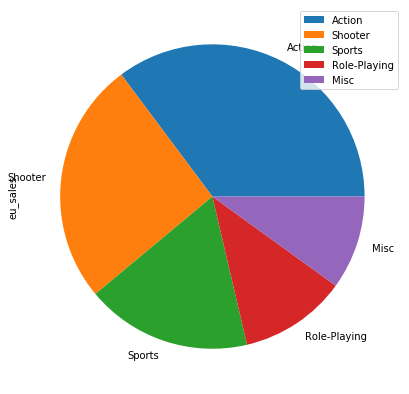

In [39]:
eu_platform = data_new.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(ascending=False, by='eu_sales')
eu_platform = eu_platform[0:5]
eu_platform.plot(kind='pie', figsize=(10, 7), y='eu_sales')

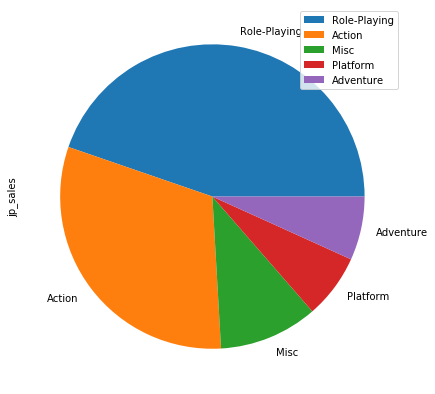

In [40]:
jp_platform = data_new.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(ascending=False, by='jp_sales')
jp_platform = jp_platform[0:5]
jp_platform.plot(kind='pie', figsize=(10, 7), y='jp_sales')

NA and Europe show the same preferences in genres too. Action, Shooter, Sports are the top 3 in both regions. In Japan the most popular genre is Role-playing whereas Action is only second top. Action, Shooter, Sports and Role-playing are highly profitable and the most popular genres that is why they have the largest market shares in the regions.  

<div class="alert alert-block alert-success">
<b>Success:</b> Choosing a pie chart is the best solution for this task! The conclusions are great! 
</div>

The effect of ESRB rating on sales of each region

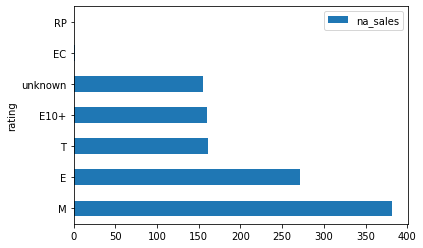

In [41]:
na_rating = data_new.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(ascending=False, by='na_sales')
na_rating.plot(kind='barh')

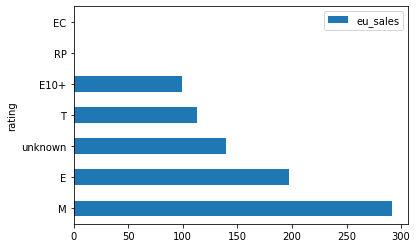

In [42]:
eu_rating = data_new.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(ascending=False, by='eu_sales')
eu_rating.plot(kind='barh')

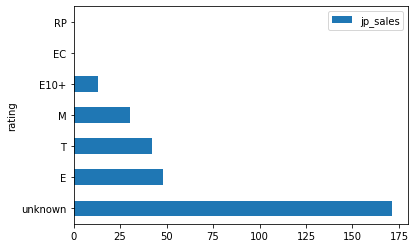

In [43]:
jp_rating = data_new.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(ascending=False, by='jp_sales')
jp_rating.plot(kind='barh')

NA and Europe again have the same results with M, E and T being the most profitable genres. Most of the games played in Japan have "unknown" rating, which can be evenly distributed among E, T and M. In general, we see that the ESRB rating does not influence the sales since games rated as M, which only make up 9% of all games released, are still highly profitable in the regions. 

<div class="alert alert-block alert-success">
<b>Success:</b> Well done!
</div>

### Step 5. Hypotheses testing

Test 1

H0- The average user scores are the same for Xone and PC. H1- The average user scores for Xone and PC differ. 

In [44]:
from scipy import stats as st

Xone = data_new.query('platform=="XOne"')['user_score']
PC = data_new.query('platform=="PC"')['user_score']

alpha=0.05

results = st.ttest_ind(Xone, PC,equal_var=False)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value:  0.8778653005073463
We can't reject the null hypothesis


The test has shown that we cannot reject the null hypothesis, p-value is larger than any reasonable significance level which means that the average user scores for two platforms are same. 

Test 2

H0- The average user scores for Action and Sports genres is not different. H1- The average user scores for Action and Sports genres is different.

In [45]:
Action = data_new.query('genre=="Action"')['user_score']
Sports = data_new.query('genre=="Sports"')['user_score']

alpha=0.05

results = st.ttest_ind(Action, Sports,equal_var=False)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value:  5.614846828146844e-17
We reject the null hypothesis


The p-value is 0 and the H0 is rejected meaning that the average scores for both genres are different. 

<div class="alert alert-block alert-info">
<b>Remarks: </b> You can print means for Action and Sport genres. It will be interesting to see the difference.
</div>

<div class="alert alert-block alert-success">
<b>Success:</b> Good job! You've mastered the hypothesis testing technique!
</div>

### Step 6. General conclusion

The analysis showed that the gaming industry had been rapidly increasing starting from 1993 reaching its peak in 2008. Since then the sales have been steadily decreasing with a dramatic drop in 2012. In 2017 the sales will probably decrease a little bit compared to 2016.  
As was said before it generally takes about 5 years for a platform to reach the peak of sales and then 5 more years to have no sales at all. For example, PS2, PS3 and X360 used to be very popular but by the year 2015 they had 0 sales. That is why it was reasonable to consider the period of 2010-2016 for further research since it will coincide with the period when some platforms die and others reach their peaks and also give a good prognosis for 2017. When some platform's popularity starts to decline another platform comes on the market. According to the analysis PS4, XOne, 3DS are going to be the most profitable platforms in 2017. Gaming companies should expect that roughly a half of the games released in 2017 will not exceed 1m USD of profit on any platform. According to the analysis, some games released on PS4, Xone and 3DS will most probably gain up to 15m USD of profit in 2017 (Boxplot analysis).  
It was also shown that user/critic scores do not affect future total sales. Moreover, games with the least user scores are highly profitable, there is no correlation between these two factors.  
The analysis also showed that the most popular and highly profitable game genres are Action, Shooter, Sports and Role-playing. The first 3 have the largest market shares in NA and Europe and the last one is a leader in Japan.  
To have good sales in 2017 gaming companies should release games on PS4, Xone and 3DS. They should target on mature audience if sales are made primarily in NA and Europe since M-rated games are the most popular in these regions. M or T rated games in Action, Shooter or Sports genres for NA and Europe and E, M, T rated games in Role-playing and Action genres for Japan would be an ideal 2017 compaign. 

<div class="alert alert-block alert-info">
<b>Remarks: </b> please use bullet points, bold font, and other hints to make your conclusions easier to read and understand.
</div>